In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Global variables

In [5]:
DIR_TFRECORDS = 'data_small_tfrecords'


## Input function for estimator

In [12]:
def parse_record(record):
    # dictionary as per saved TFRecord
    keys_to_features = {
        'img': tf.FixedLenFeature(shape=(), dtype=tf.string),
        'label': tf.FixedLenFeature(shape=(), dtype=tf.string),
    }
    
    # parse record
    parsed = tf.parse_single_example(record, keys_to_features)
    
    # decode image
    img = tf.decode_raw(parsed['img'], tf.uint8)
    img = tf.reshape(img, [500, 486, 3])
    
    # decode label
    label = tf.decode_raw(parsed['label'], tf.float64)
    label = tf.reshape(label, [1, 4])
    
    return {'img': img}, label
    
def input_fn_train(data_file):
    dataset = tf.data.TFRecordDataset(data_file)
    
    dataset = dataset.map(parse_record)
    
    iterator = dataset.make_one_shot_iterator()
    features, labels = iterator.get_next()
    
    return features, labels

In [13]:
tf.reset_default_graph()
f, l = input_fn_train(DIR_TFRECORDS+'/0.tfrecords')

with tf.Session() as sess:
    f, l = sess.run([f,l])

In [15]:
l.shape

(1, 4)

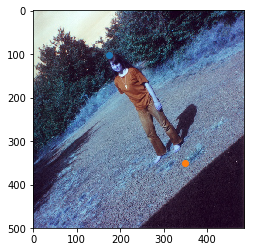

In [17]:
plt.imshow(f['img'])
plt.scatter(l[0][1], l[0][0])
plt.scatter(l[0][3], l[0][2])
plt.show()